# White-box Attack on CIFAR10

In [1]:
import sys

import torch
import torch.nn as nn

sys.path.insert(0, '..')
import torchattacks

import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18


## Load model and data

In [11]:
# GO-GO-GO!
normalize  =  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    

# Undo normalization for now
transform_test = transforms.Compose([
    transforms.ToTensor(), 
    ])


valset = torchvision.datasets.CIFAR10(root='/bigstor/zsarwar/CIFAR10', train=False,
                                    download=False, transform=transform_test
                                        )
                                    
dataloader = torch.utils.data.DataLoader(valset, batch_size=128,
                                            shuffle=False, num_workers=2)
   
model = resnet18()
model.fc = nn.Linear(in_features=512, out_features=10, bias=True)
loc = 'cuda:{}'.format(1)
# Load best checkpoint
best_ckpt_path = "/bigstor/zsarwar/SparseDNNs/MT_CIFAR10_full_10_d5f3f545a0883adb9c8f98e2a6ba4ac7/MT_Baseline_d2a45a4dd02a5e037e5954b82387e666/Checkpoints/model_best.pth.tar"
checkpoint = torch.load(best_ckpt_path, map_location=loc)
model.load_state_dict(checkpoint['state_dict'])

model = model.cuda()
mean = (0.4914, 0.4822, 0.4465)
std = (0.247, 0.243, 0.261)
images, labels = next(iter(dataloader))

In [12]:
sys.path.insert(0, '..')
device = "cuda:0"

## Adversarial Attack

In [13]:
from torchattacks import CW, DeepFool
from utils import imshow, get_pred
import matplotlib.pyplot as plt

In [14]:
#atk = CW(model, c=0.02,  steps=200, lr=0.01)
atk = torchattacks.DeepFool(model, steps=50, overshoot=0.02)

In [15]:
# When normalization used:

#mean = (0.4914, 0.4822, 0.4465)
#std = (0.247, 0.243, 0.261)

atk.set_normalization_used(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])

In [16]:
adv_images = atk(images, labels)

In [17]:
adv_images_ = adv_images.to(device)

In [19]:
adv_images.shape

torch.Size([128, 3, 32, 32])

In [29]:
model = model.eval()

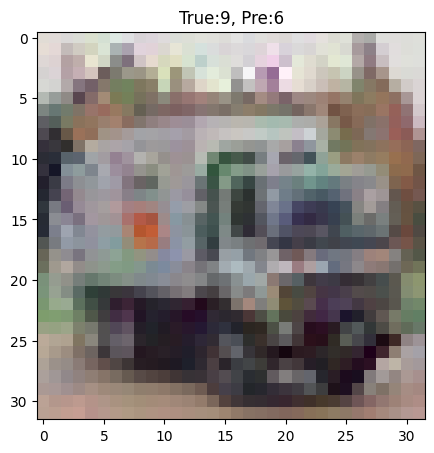

: 

In [41]:
idx = 11
pre = get_pred(model, adv_images[idx:idx+1], device)
imshow(adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))

In [21]:
# Undo normalization for now
transform_test = transforms.Compose([
    transforms.ToTensor(), 
    ])


valset = torchvision.datasets.CIFAR10(root='/bigstor/zsarwar/CIFAR10', train=False,
                                    download=False, transform=transform_test
                                        )
                                    
dataloader = torch.utils.data.DataLoader(valset, batch_size=128,
                                            shuffle=False, num_workers=2)
   

In [22]:
inputs, _ = next(iter(dataloader))

In [23]:
img_r = inputs[2]
img_r = img_r.swapaxes(0,1)
img_r = img_r.swapaxes(1,2)

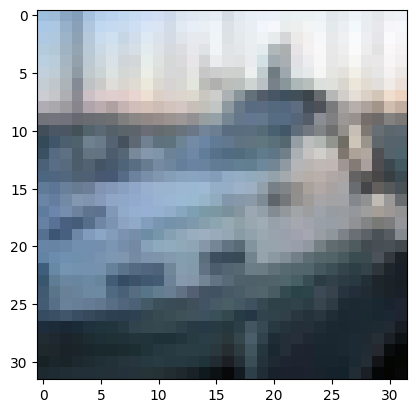

In [24]:
plt.imshow(img_r)